In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
health_in=pd.read_csv("Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")

In [3]:
health_out=pd.read_csv("Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv")

In [4]:
health_in_1=health_in[['DRG Definition','Provider Name','Provider State','Hospital Referral Region (HRR) Description','Total Discharges','Average Covered Charges','Average Total Payments']]

In [5]:
health_in_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 7 columns):
DRG Definition                                163065 non-null object
Provider Name                                 163065 non-null object
Provider State                                163065 non-null object
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 8.7+ MB


In [6]:
health_in_2=health_out[['APC','Provider Name','Provider State','Hospital Referral Region (HRR) Description','Outpatient Services','Average  Estimated Submitted Charges','Average Total Payments']]

In [7]:
health_in_1.rename(columns={'DRG Definition':'Procedure','Hospital Referral Region (HRR) Description':'Region','Average Covered Charges':'Charges','Average Total Payments':'Payments'},inplace=True)

C:\Users\hp\Anaconda2\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [8]:
health_in_1.head()

,Procedure,Provider Name,Provider State,Region,Total Discharges,Charges,Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,91,32963.07692,5777.241758
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,AL,AL - Birmingham,14,15131.85714,5787.571429
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ELIZA COFFEE MEMORIAL HOSPITAL,AL,AL - Birmingham,24,37560.37500,5434.958333
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST VINCENT'S EAST,AL,AL - Birmingham,25,13998.28000,5417.560000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SHELBY BAPTIST MEDICAL CENTER,AL,AL - Birmingham,18,31633.27778,5658.333333


In [9]:
health_in_2.rename(columns={'APC':'Procedure','Hospital Referral Region (HRR) Description':'Region','Outpatient Services':'Total Discharges','Average  Estimated Submitted Charges':'Charges','Average Total Payments':'Payments'},inplace=True)

In [10]:
health_concat=pd.concat([health_in_1,health_in_2])

In [11]:
health_concat.to_csv('health_concat.csv')

In [12]:
health_concat.isnull().any()

Procedure           False
Provider Name       False
Provider State      False
Region              False
Total Discharges    False
Charges             False
Payments            False
dtype: bool

In [13]:
health_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 43371
Data columns (total 7 columns):
Procedure           206437 non-null object
Provider Name       206437 non-null object
Provider State      206437 non-null object
Region              206437 non-null object
Total Discharges    206437 non-null int64
Charges             206437 non-null float64
Payments            206437 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 12.6+ MB


In [14]:
health_concat['Charges']=health_concat['Charges'].round(2)
health_concat['Payments']=health_concat['Payments'].round(2)

In [15]:
health_concat_grouped_provider=health_concat.groupby('Provider Name').agg({'Procedure':'nunique','Provider State':'nunique','Region':'nunique'
                                                                 ,'Total Discharges':'sum','Charges':'sum','Payments':'sum'})

In [16]:
health_concat_grouped_region=health_concat.groupby('Region').agg({'Procedure':'nunique','Provider State':'nunique','Provider Name':'nunique'
                                                                 ,'Total Discharges':'sum','Charges':'sum','Payments':'sum'})

In [17]:
health_concat_grouped_region.head()

,Total Discharges,Provider State,Charges,Provider Name,Payments,Procedure
Region,,,,,,
AK - Anchorage,31406,1,9427445.52,9,3390445.95,100
AL - Birmingham,166237,2,68364063.11,40,14648212.20,127
AL - Dothan,43700,3,9561883.16,10,2419670.08,122
AL - Huntsville,71691,2,11754072.47,8,3090569.68,125
AL - Mobile,70394,2,16193817.95,14,4256181.67,125


In [95]:
health_concat_grouped_provider.head()

,Total Discharges,Provider State,Charges,Region,Payments,Procedure
Provider Name,,,,,,
ABBEVILLE GENERAL HOSPITAL,1294,1,314058.89,1,121115.80,25
ABBOTT NORTHWESTERN HOSPITAL,20810,1,4495571.85,1,1065438.89,121
ABILENE REGIONAL MEDICAL CENTER,7285,1,3613719.38,1,516580.33,71
ABINGTON MEMORIAL HOSPITAL,19300,1,6832266.25,1,1027582.36,121
ACMH HOSPITAL,4151,1,406719.05,1,199332.50,54


In [18]:
health_concat_grouped_region=health_concat_grouped_region.reset_index()
health_concat_grouped_region

,Region,Total Discharges,Provider State,Charges,Provider Name,Payments,Procedure
0,AK - Anchorage,31406,1,9.427446e+06,9,3390445.95,100
1,AL - Birmingham,166237,2,6.836406e+07,40,14648212.20,127
2,AL - Dothan,43700,3,9.561883e+06,10,2419670.08,122
3,AL - Huntsville,71691,2,1.175407e+07,8,3090569.68,125
4,AL - Mobile,70394,2,1.619382e+07,14,4256181.67,125
5,AL - Montgomery,26109,1,9.319738e+06,12,2804767.30,119
6,AL - Tuscaloosa,33764,1,4.588872e+06,7,1447332.86,121
7,AR - Fort Smith,69493,2,5.995093e+06,8,1918826.61,118
8,AR - Jonesboro,31636,2,5.271891e+06,5,2056521.63,118
9,AR - Little Rock,240441,1,3.259645e+07,25,9623706.39,130


In [19]:
health_concat_grouped_provider=health_concat_grouped_provider.reset_index()
health_concat_grouped_provider

,Provider Name,Total Discharges,Provider State,Charges,Region,Payments,Procedure
0,ABBEVILLE GENERAL HOSPITAL,1294,1,314058.89,1,121115.80,25
1,ABBOTT NORTHWESTERN HOSPITAL,20810,1,4495571.85,1,1065438.89,121
2,ABILENE REGIONAL MEDICAL CENTER,7285,1,3613719.38,1,516580.33,71
3,ABINGTON MEMORIAL HOSPITAL,19300,1,6832266.25,1,1027582.36,121
4,ACMH HOSPITAL,4151,1,406719.05,1,199332.50,54
5,ADCARE HOSPITAL OF WORCESTER INC,1571,1,4227.47,1,4967.57,1
6,ADENA REGIONAL MEDICAL CENTER,19639,1,2167884.32,1,850296.93,111
7,ADIRONDACK MEDICAL CENTER,1561,1,355059.76,1,196213.60,32
8,ADVANCED SURGICAL HOSPITAL,71,1,36100.86,1,21777.55,1
9,ADVENTIST BOLINGBROOK HOSPITAL,2652,1,1540952.83,1,387791.94,56


In [178]:
health_concat_grouped[health_concat_grouped['Total Discharges']==402799]

,Provider Name,Total Discharges,Provider State,Charges,Region,Payments,Procedure
2397,SCOTT & WHITE MEMORIAL HOSPITAL,402799,1,2823332.26,1,1061028.55,122


In [20]:
health_concat_grouped_provider_num = health_concat_grouped_provider.select_dtypes(include =['int64', 'float64']).copy()

In [21]:
health_concat_grouped_region_num = health_concat_grouped_region.select_dtypes(include =['int64', 'float64']).copy()

In [22]:
col_list_region = health_concat_grouped_region_num.columns
col_list_region

Index([u'Total Discharges', u'Provider State', u'Charges', u'Provider Name',
       u'Payments', u'Procedure'],
      dtype='object')

In [98]:
col_list_prov = health_concat_grouped_provider_num.columns
col_list_prov

Index([u'Total Discharges', u'Provider State', u'Charges', u'Region',
       u'Payments', u'Procedure'],
      dtype='object')

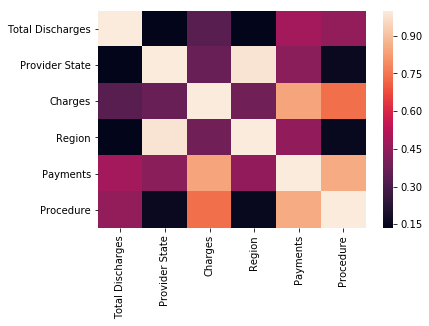

In [28]:
sns.heatmap(health_concat_grouped.corr())

# - Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
Before applying PCA we will standardize data to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

In [23]:
from sklearn.preprocessing import  StandardScaler

In [24]:
sc=StandardScaler()

In [25]:
Medicare_region_scaled=sc.fit_transform(health_concat_grouped_region_num)

In [26]:
Medicare_provider_scaled=sc.fit_transform(health_concat_grouped_provider_num)

# e) Applying PCA

In [27]:
from sklearn.decomposition import PCA

In [31]:
var_ratio1={}
for n1 in range(2,7):
    pc1=PCA(n_components=n1)
    Medicare_region_pca=pc1.fit(Medicare_region_scaled)
    var_ratio1[n1]=sum(Medicare_region_pca.explained_variance_ratio_)

In [32]:
var_ratio={}
for n in range(2,7):
    pc=PCA(n_components=n)
    Medicare_provider_pca=pc.fit(Medicare_provider_scaled)
    var_ratio[n]=sum(Medicare_provider_pca.explained_variance_ratio_)

In [33]:
reduced_cr=pc.fit_transform(Medicare_provider_scaled)

In [34]:
reduced_cr1=pc1.fit_transform(Medicare_region_scaled)

In [35]:
var_ratio

{2: 0.8259870317141473,
 3: 0.9459627950199215,
 4: 0.9832068675286117,
 5: 0.9970779465121004,
 6: 1.0}

In [36]:
var_ratio1

{2: 0.7786413772138223,
 3: 0.8942498874291218,
 4: 0.9665519044327815,
 5: 0.9903786486528798,
 6: 1.0}

In [37]:
pd.DataFrame(pc1.components_.T, columns=['PC_' + str(i) for i in range(6)], index=col_list_region)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
Total Discharges,0.424189,-0.090060,-0.149066,0.852557,0.113438,-0.223631
Provider State,0.117119,0.919499,0.334287,0.079286,0.150699,0.007739
Charges,0.467551,-0.192563,0.227669,-0.410366,0.546813,-0.474424
Provider Name,0.486000,0.004980,0.219587,-0.151846,-0.804339,-0.213409
Payments,0.500932,-0.150287,0.166591,-0.037931,0.135779,0.823926
Procedure,0.317197,0.294480,-0.859202,-0.271965,0.004605,0.021308


In [38]:
pd.DataFrame(pc.components_.T, columns=['PC_' + str(i) for i in range(6)], index=col_list_prov)

NameError: name 'col_list_prov' is not defined

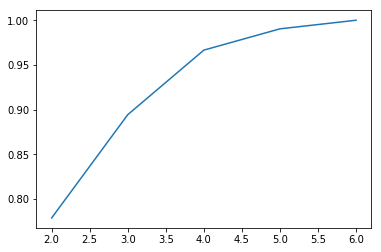

In [40]:
pd.Series(var_ratio1).plot()

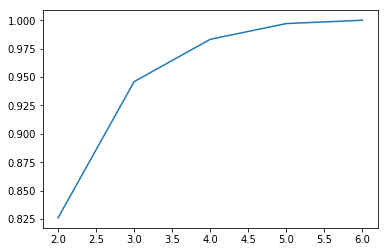

In [39]:
pd.Series(var_ratio).plot()

In [41]:
from sklearn import metrics

In [42]:
from sklearn.cluster import KMeans

In [44]:
# calculate SC for K=3 through K=12
k_range1 = range(2, 25)
scores1 = []
for k1 in k_range1:
    km1 = KMeans(n_clusters=k1, random_state=1)
    km1.fit(Medicare_region_scaled)
    scores1.append(metrics.silhouette_score(Medicare_region_scaled, km1.labels_))

In [45]:
# calculate SC for K=3 through K=12
k_range = range(2, 25)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(Medicare_provider_scaled)
    scores.append(metrics.silhouette_score(Medicare_provider_scaled, km.labels_))

In [46]:
scores

[0.5020108687014239,
 0.5201381226426041,
 0.5355898254291706,
 0.5516056228071896,
 0.45082940343251965,
 0.42797340558229646,
 0.4303737913206283,
 0.4312682593667877,
 0.3970413810656433,
 0.3947968630905732,
 0.39811603295080794,
 0.39954939316357474,
 0.36418744250607804,
 0.3620146675942216,
 0.354977869135085,
 0.3538026430711452,
 0.3547182671868381,
 0.3423794732353157,
 0.3333001017399225,
 0.34624253597643323,
 0.3254703247980172,
 0.33151708272118985,
 0.3336523596345948]

In [47]:
scores1

[0.4953430597015008,
 0.31469461595992654,
 0.38723930861548855,
 0.4059540045327712,
 0.41658342481589783,
 0.3602356442674511,
 0.3736078518396808,
 0.33181860209848074,
 0.35922684225522306,
 0.32486144020671803,
 0.3087469225848499,
 0.34302864297751723,
 0.332025356155216,
 0.3506240844656679,
 0.33524894444045594,
 0.3416901475879374,
 0.310772771544994,
 0.3181120783799598,
 0.3129355237199369,
 0.31127906990287796,
 0.28677931191675227,
 0.29308142488925487,
 0.2994641190217126]

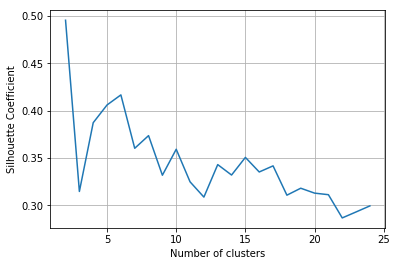

In [49]:

# plot the results
plt.plot(k_range1, scores1)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

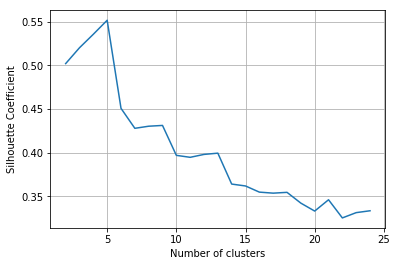

In [50]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [52]:
from sklearn.cluster import KMeans

km_20=KMeans(n_clusters=20,random_state=123)
km_20.fit(reduced_cr1)
km_20.labels_
pd.Series(km_20.labels_).value_counts()

8     62
0     44
18    43
2     29
15    29
11    18
7     17
5     16
14     9
13     9
3      8
1      5
12     5
4      3
9      3
17     2
6      1
10     1
16     1
19     1
dtype: int64

In [53]:
from sklearn.cluster import KMeans

km_22=KMeans(n_clusters=22,random_state=123)
km_22.fit(reduced_cr)
km_22.labels_
pd.Series(km_22.labels_).value_counts()

2     615
19    544
11    496
8     360
18    330
3     189
9     181
0     160
13     83
17     57
4      38
12     33
6      33
20     26
16     22
1      12
5       6
15      5
7       4
21      4
14      2
10      1
dtype: int64

In [114]:
cluster_df_22=pd.concat([health_concat_grouped_provider, pd.Series(km_22.labels_, name='Cluster_22')], axis=1)

In [115]:
cluster_df_22.to_csv('cluster_df_22_2.csv')

In [54]:
cluster_df_20=pd.concat([health_concat_grouped_region, pd.Series(km_20.labels_, name='Cluster_20')], axis=1)

In [55]:
cluster_df_20.to_csv('cluster_df_20_2.csv')